## Fetching the data from db

In [90]:
from scipy.stats import shapiro
import importlib
import utils2

importlib.reload(utils2)
from utils2 import *

In [91]:
cursor = aggregate_joular_node_entity_by_value("spring-boot",25)
all_data = [doc for doc in cursor]

## Distribution of the values and outliers research

In [103]:
all_data_without_outliers = removeOutliers(all_data)
all_values_without_outliers = [doc["values"] for doc in all_data_without_outliers]

for (x in all_values_without_outliers):

Len with outliers :  216
Len without outliers (with at least 25 values) :  204


In [100]:
test = [11.605299949645996, 12.474599838256836, 11.73740005493164, 13.461400032043457, 14.80780029296875, 3.8285000324249268, 14.618499755859375, 16.57229995727539, 14.299500465393066, 12.067899703979492, 16.85689926147461, 12.824199676513672, 13.536999702453613, 11.672300338745117, 9.748800277709961, 13.746100425720215, 16.33650016784668, 13.931699752807617, 11.996700286865234, 12.44789981842041, 14.050399780273438, 10.753600120544434, 15.316900253295898, 14.84469985961914, 11.371000289916992, 13.395299911499023, 13.269599914550781, 11.134200096130371, 13.190699577331543]
print(len(test))
test_without_outliers = removeOutliersByZScore(test)
print(test_without_outliers)
print(len(test_without_outliers))

29
[11.60529995 12.47459984 11.73740005 13.46140003 14.80780029 14.61849976
 16.57229996 14.29950047 12.0678997  16.85689926 12.82419968 13.5369997
 11.67230034  9.74880028 13.74610043 16.33650017 13.93169975 11.99670029
 12.44789982 14.05039978 10.75360012 15.31690025 14.84469986 11.37100029
 13.39529991 13.26959991 11.1342001  13.19069958]
28


### Boxplot of all values

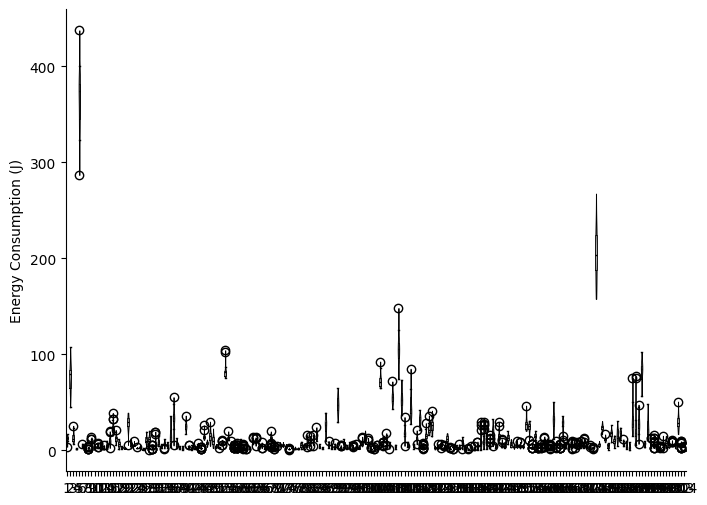

In [104]:
violin_and_boxplot(all_values_without_outliers, ylabel="Energy Consumption (J)")

### Shapiro-Wilk test

[11.605299949645996, 12.474599838256836, 11.73740005493164, 13.461400032043457, 14.80780029296875, 3.8285000324249268, 14.618499755859375, 16.57229995727539, 14.299500465393066, 12.067899703979492, 16.85689926147461, 12.824199676513672, 13.536999702453613, 11.672300338745117, 9.748800277709961, 13.746100425720215, 16.33650016784668, 13.931699752807617, 11.996700286865234, 12.44789981842041, 14.050399780273438, 10.753600120544434, 15.316900253295898, 14.84469985961914, 11.371000289916992, 13.395299911499023, 13.269599914550781, 11.134200096130371, 13.190699577331543]

[1.1512999534606934, 2.7044999599456787, 2.31820011138916, 1.1109000444412231, 1.1151000261306763, 2.2321999073028564, 1.1161999702453613, 1.0851000547409058, 1.105299949645996, 1.2143000364303589, 1.1277999877929688, 1.1282000541687012, 1.1342999935150146, 1.8428000211715698, 1.1983000040054321, 1.145900011062622, 2.477299928665161, 2.1786999702453613, 1.1030000448226929, 1.2222000360488892, 1.1612999439239502, 1.27919995

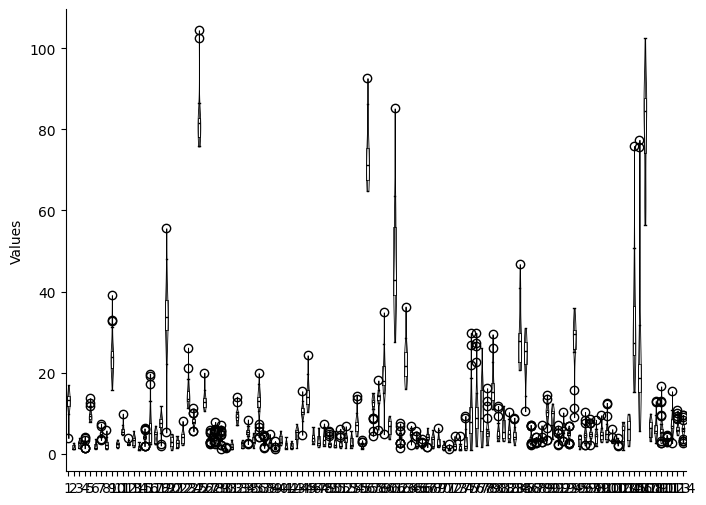

In [105]:
count = 0
non_normal_values = []
for i,values in enumerate(all_values_without_outliers, start=1):
    stat, p = shapiro(values)
    if (p <= 0.05):
        """print(f"Document {i}:")
        print(f"Shapiro-Wilk Test Statistic: {stat}")
        print(f"P-value: {p}")"""
        print(values)
        print()
        count += 1
        non_normal_values.append(values)
print(count)

violin_and_boxplot(non_normal_values)